In [17]:
#Import necessary libraries and the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
import numpy as np
df=pd.read_csv('churn_clean_d212t2.csv') 

In [18]:
#Drop categorical features and non-linear features
df=df.select_dtypes(exclude=['object'])    
df=df.drop(columns=['CaseOrder','Zip','Lat','Lng'])
df.shape

(10000, 19)

In [19]:
#Rename survey columns with more informative names from data dictionary
df.rename(columns={'Item1' :'Responses_Timely',
'Item2' : 'Fixes_Timely',
'Item3':'Replacements_Timely',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respecful_response',
'Item7':'Courteous_exchange',
'Item8':'Active_Listening'},inplace=True)
df.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses_Timely', 'Fixes_Timely',
       'Replacements_Timely', 'Reliability', 'Options', 'Respecful_response',
       'Courteous_exchange', 'Active_Listening'],
      dtype='object')

In [21]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-0.67340479, -0.97233791,  0.72092524, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [ 0.04777153, -0.50659192, -1.25995716, ..., -0.48116458,
         0.47693123,  0.49038392],
       [-0.41723753,  0.89064606, -0.14873045, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [-0.64790585, -0.50659192, -0.24535886, ...,  0.48638938,
         0.47693123,  1.46259628],
       [ 1.78897441, -0.50659192, -0.6801867 , ..., -0.48116458,
         1.44926808,  0.49038392],
       [ 0.17138592, -0.50659192, -1.21164295, ..., -0.48116458,
         0.47693123, -2.42625317]])

In [22]:
df1 = pd.DataFrame(df, columns=['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Responses_Timely', 'Fixes_Timely',
       'Replacements_Timely', 'Reliability', 'Options', 'Respecful_response',
       'Courteous_exchange', 'Active_Listening'])
df1

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses_Timely,Fixes_Timely,Replacements_Timely,Reliability,Options,Respecful_response,Courteous_exchange,Active_Listening
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.631692,0.424900,-1.453214,0.564456,-0.196888,-0.005288,1.017588,-0.625864,1.273401,-0.294484,1.427298,-0.472948,-1.454781,-0.473770,-0.485004,0.494844,-0.481165,-1.467742,-0.481828
9996,4.670977,0.890646,-0.245359,-0.201344,-1.095915,0.986203,1.017588,-0.625864,1.002740,0.811726,1.054194,0.490679,1.444922,1.471896,0.489878,0.494844,1.453943,-1.467742,1.462596
9997,-0.647906,-0.506592,-0.245359,0.219037,-1.146198,-0.666282,-1.005852,-0.625864,0.487513,-0.061729,0.350984,0.490679,0.478354,0.499063,0.489878,0.494844,0.486389,0.476931,1.462596
9998,1.788974,-0.506592,-0.680187,-0.820588,0.695616,0.655706,0.005868,-0.625864,1.383018,1.863005,1.407713,0.490679,0.478354,2.444730,0.489878,-0.480987,-0.481165,1.449268,0.490384


In [30]:
#export the cleaned and scaled file 
df1.to_csv('df212task2clean.csv')

In [24]:
#create a covariance matrix
#Source (Data to Fish)
covMatrix = np.cov(df,bias=True)
covMatrix

array([[ 0.78208397,  0.18669043,  0.13806434, ...,  0.22441617,
        -0.08406959, -0.58707465],
       [ 0.18669043,  0.61247322,  0.18297077, ..., -0.01826943,
         0.10884711,  0.00293524],
       [ 0.13806434,  0.18297077,  0.47004212, ..., -0.04456211,
        -0.27881686, -0.21287527],
       ...,
       [ 0.22441617, -0.01826943, -0.04456211, ...,  0.42427628,
         0.08477389, -0.30226344],
       [-0.08406959,  0.10884711, -0.27881686, ...,  0.08477389,
         0.91790653,  0.46133395],
       [-0.58707465,  0.00293524, -0.21287527, ..., -0.30226344,
         0.46133395,  1.05744817]])

In [25]:
#Source (Toth, Principal Components Analysis with Python (Sci-Kit Learn) 2020)
#Apply PCA to learn and fit the data
pca = PCA(n_components=df.shape[1])
pca.fit(df)
ratios = pca.explained_variance_ratio_*100 
var=pca.explained_variance_ 

In [26]:
var

array([2.9488622 , 1.99711171, 1.63671727, 1.05702058, 1.02999674,
       1.0193387 , 1.00479276, 0.99929721, 0.99162903, 0.98073847,
       0.96449758, 0.96097387, 0.77873615, 0.69020404, 0.59233869,
       0.53779997, 0.48177549, 0.3246098 , 0.00545993])

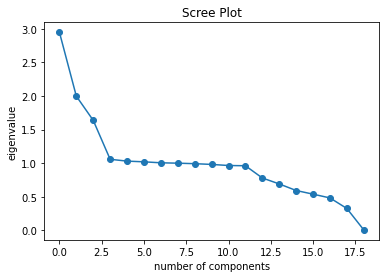

In [27]:
#Create the Scree plot
x = range(pca.n_components_)
plt.plot(x, var, '-o')
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.title('Scree Plot')
plt.show()

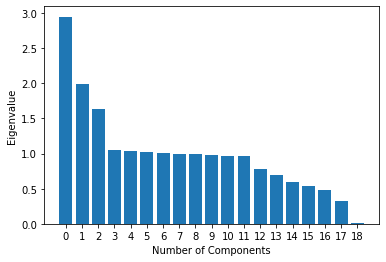

In [28]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.xticks(features)
plt.show()

In [29]:
loadings=pd.DataFrame(pca.components_.T,index=df1.columns,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,-0.002109,-0.005463,0.014732,-0.292151,0.264958,0.402355,0.355864,0.329128,0.161654,0.580378,0.167295,0.229022,-0.057130,0.019142,-0.016176,0.001210,-0.005661,-0.002356,-0.000322
Children,0.004072,0.015862,0.028393,0.510569,0.345310,-0.089376,0.119069,0.226847,0.155912,-0.175953,0.655599,-0.241974,0.017020,-0.012250,-0.014011,0.014490,0.020915,-0.000948,-0.021615
Age,0.006459,0.000294,-0.029319,-0.455297,-0.417933,0.183902,0.152752,-0.024113,0.346066,-0.180481,0.234748,-0.590829,-0.045336,0.002513,-0.002495,-0.009405,0.005784,0.013696,0.022421
Income,0.001038,0.006035,0.025865,0.252065,-0.285030,-0.084983,-0.429611,0.581477,0.449649,0.219833,-0.252659,-0.057674,-0.020484,-0.079018,-0.007573,-0.002561,0.005301,0.013466,-0.000910
Outage_sec_perweek,-0.017516,0.003927,-0.014363,-0.220115,0.339482,-0.591284,0.273527,0.262607,-0.149557,0.125521,-0.319263,-0.439536,-0.089844,0.016926,-0.008716,0.013529,0.018262,0.013516,0.000361
Email,0.008744,-0.020609,-0.003459,-0.190450,0.519450,0.319498,-0.103117,0.170129,0.290785,-0.592268,-0.328652,0.061145,0.061158,-0.017175,-0.016342,0.006449,-0.017253,0.000961,0.000226
Contacts,-0.008761,0.003318,-0.011853,-0.420731,-0.124577,-0.146366,-0.275202,0.508824,-0.434373,-0.248703,0.371468,0.241548,0.044032,-0.035285,-0.003279,-0.026498,0.020255,-0.000813,-0.000948
Yearly_equip_failure,-0.007688,0.017604,0.008199,0.167516,-0.373155,-0.147092,0.686465,0.241921,0.114547,-0.334113,-0.146136,0.365394,0.020739,0.006446,-0.015853,-0.001308,0.007488,-0.021448,-0.000145
Tenure,-0.016320,0.702323,-0.063085,-0.005355,-0.007568,0.048576,0.000016,0.007554,-0.028780,-0.001590,-0.028600,-0.027147,0.005940,-0.003507,0.006548,-0.007773,-0.004625,0.007519,-0.705251
MonthlyCharge,0.000930,0.039858,-0.009499,-0.298690,0.113921,-0.537631,-0.112559,-0.284655,0.562547,0.029519,0.228176,0.375187,-0.005920,0.014551,-0.016508,-0.000068,0.021494,-0.012007,-0.045778
